# Visualization
This notebook generates all of the visualizations used in our project.

In [1]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# read in JSON file
df = pd.read_json('lyrics_dataframe.json')

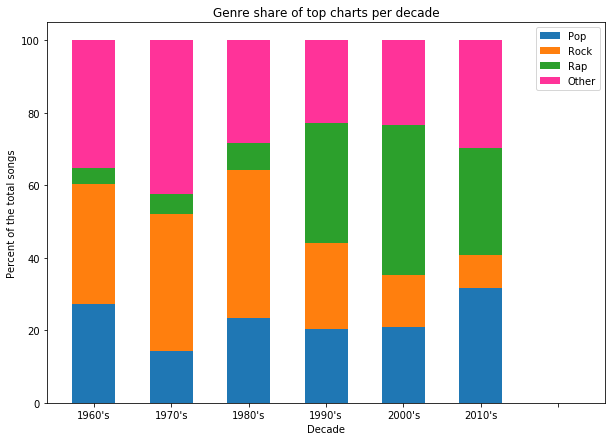

In [2]:
# divide genres into individual dataframes
rap = df[df['genre'] == 'Rap']
pop = df[df['genre'] == 'Pop']
rock = df[df['genre'] == 'Rock']
other = df[df['genre'] == 'Other']
    
num_rap = []; num_pop = []; num_rock = []; num_other = []

# divide into decades
for decade in range(1960,2019, 10):
    rap_decade = rap[(rap['year'] >= decade) & (rap['year'] < decade + 10)]
    num_rap.append(len(rap_decade))
    pop_decade = pop[(pop['year'] >= decade) & (pop['year'] < decade + 10)]
    num_pop.append(len(pop_decade))
    rock_decade = rock[(rock['year'] >= decade) & (rock['year'] < decade + 10)]
    num_rock.append(len(rock_decade))
    other_decade = other[(other['year'] >= decade) & (other['year'] < decade + 10)]
    num_other.append(len(other_decade))

ind = [1960, 1970, 1980, 1990, 2000, 2010, 2020]    # the x locations for the groups
width = 5.54       # the width of the bars: can also be len(x) sequence

num_all = [i + j + k + l for i,j,k,l in zip(num_pop,num_rock,num_rap,num_other)]

# calculate percentages 
percent_rap = [i/j * 100 for i,j in zip(num_rap,num_all)]
percent_pop = [i/j * 100 for i,j in zip(num_pop,num_all)]
percent_rock = [i/j * 100 for i,j in zip(num_rock,num_all)]
percent_other = [i/j * 100 for i,j in zip(num_other,num_all)]

# append 0s as lower end of percents
percent_rap.append(0)
percent_pop.append(0)
percent_rock.append(0)
percent_other.append(0)

# combine percents for graphing
percent_rock_pop = [i + j for i,j in zip(percent_pop,percent_rock)]
percent_rock_pop_rap = [i + j + k for i,j,k in zip(percent_pop,percent_rock,percent_rap)]

# prepare figure
plt.figure(figsize=(10, 7))
p1 = plt.bar(ind, percent_pop, width)
p2 = plt.bar(ind, percent_rock, width, bottom=percent_pop)
p3 = plt.bar(ind, percent_rap, width, bottom=percent_rock_pop)
p4 = plt.bar(ind, percent_other, width, bottom=percent_rock_pop_rap, color='#ff3399')

# labeling axis and title
plt.xlabel('Decade')
plt.ylabel('Percent of the total songs')
plt.title('Genre share of top charts per decade')
plt.xticks(ind, ("1960's", "1970's", "1980's","1990's","2000's","2010's"))
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Pop', 'Rock', 'Rap', 'Other'))

plt.show()

Text(0.5, 1.0, 'Average Complexity Every Year From 1960-2018')

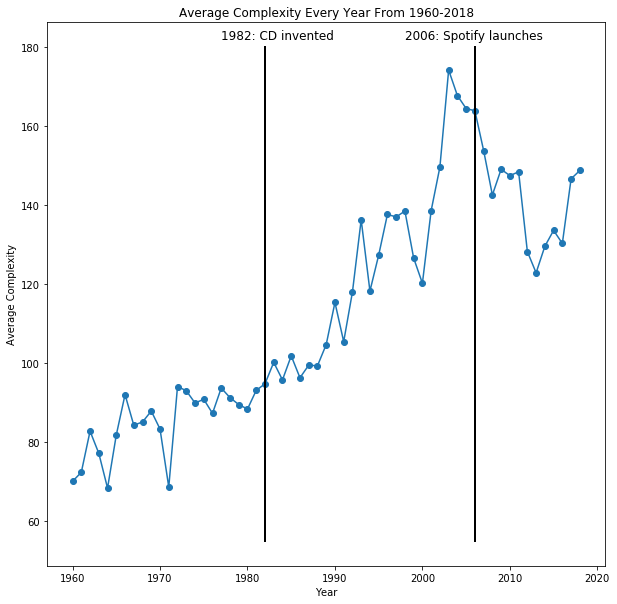

In [3]:
# prepare figure
plt.figure(figsize=(10, 10))

# create dataframe as data for graph
avg_df = pd.DataFrame(columns=['year', 'complexity'])

# calculate averages for each year
for year in range(1960, 2019):
    year_avg = 0
    df_year = df[df['year'] == int(year)]
    complexity_column = df_year['complexity']
    year_avg = complexity_column.sum()
    year_avg = year_avg / len(df_year)
    avg_df = avg_df.append({'year': year, 'complexity':year_avg}, ignore_index=True)
    
# plotting the average complexity per year
plt.plot(avg_df['year'], avg_df['complexity'], marker='o')

# Spotify line
plt.plot([2006, 2006], [55, 180], color='k', linestyle='-', linewidth=2)
plt.text(1998, 182, "2006: Spotify launches", fontsize=12)

# Compact Disk line
plt.plot([1982, 1982], [55, 180], color='k', linestyle='-', linewidth=2)
plt.text(1977, 182, "1982: CD invented", fontsize=12)

plt.xlabel('Year')
plt.ylabel('Average Complexity')
plt.title('Average Complexity Every Year From 1960-2018')

Text(0.5, 1.0, 'Complexity Distribution Of Selected Years')

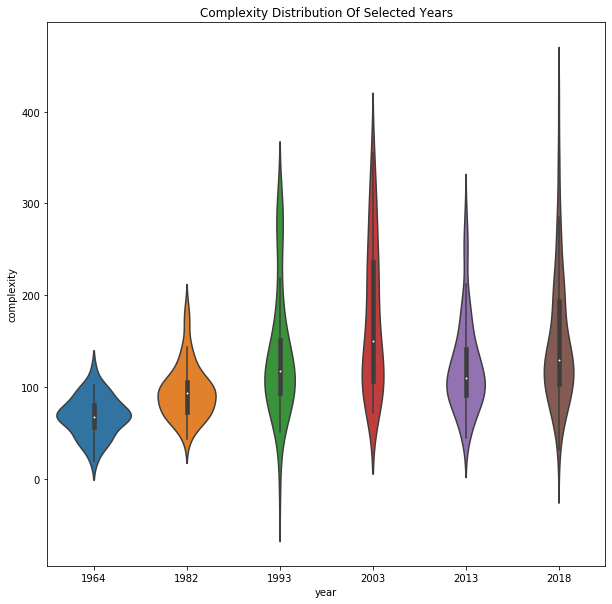

In [4]:
# prepare figure for graphing
plt.figure(figsize=(10, 10))

# set frames per year
frames = []
frames.append(df.loc[df['year'] == 1964])
frames.append(df.loc[df['year'] == 1982])
frames.append(df.loc[df['year'] == 1993])
frames.append(df.loc[df['year'] == 2003])
frames.append(df.loc[df['year'] == 2013])
frames.append(df.loc[df['year'] == 2018])

decades = pd.concat(frames)

# violinplot the individual frames
sns_plot = sns.violinplot(data=decades, x='year', y='complexity', orient='v')
sns_plot.set_title("Complexity Distribution Of Selected Years")